# Securities portfolio modeling
### Kirill Zakharov
#### 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import yfinance as yf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.style.use('ggplot')

In [3]:
# data import
names = ['SBER.ME','GAZP.ME', 'MTSS.ME', 'MGNT.ME', 'SNGS.ME', 'HYDR.ME', 'AFLT.ME', 'DSKY.ME', 'AAPL']
n = len(names)
data = pd.DataFrame(columns=names)

for name in names:
    
    data[name] = yf.download(name, '2018-01-01', '2021-02-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data.head(5)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
Date,,,,,,,,,
2018-01-03,154.489380,107.051125,197.995163,5095.507324,26.139996,0.638334,127.199066,70.177948,41.373032
2018-01-04,159.086075,110.039169,202.738434,5208.654297,26.392916,0.650833,134.899857,71.621933,41.565216
2018-01-05,158.952835,111.035172,202.199417,5283.299316,26.435070,0.654023,133.450317,71.621933,42.038452
2018-01-09,160.151993,113.367302,203.421158,5185.867676,26.528746,0.654885,136.349426,71.116539,41.877506
2018-01-10,158.393234,116.144798,204.427307,5233.011719,26.673941,0.667988,135.262268,71.658035,41.867889


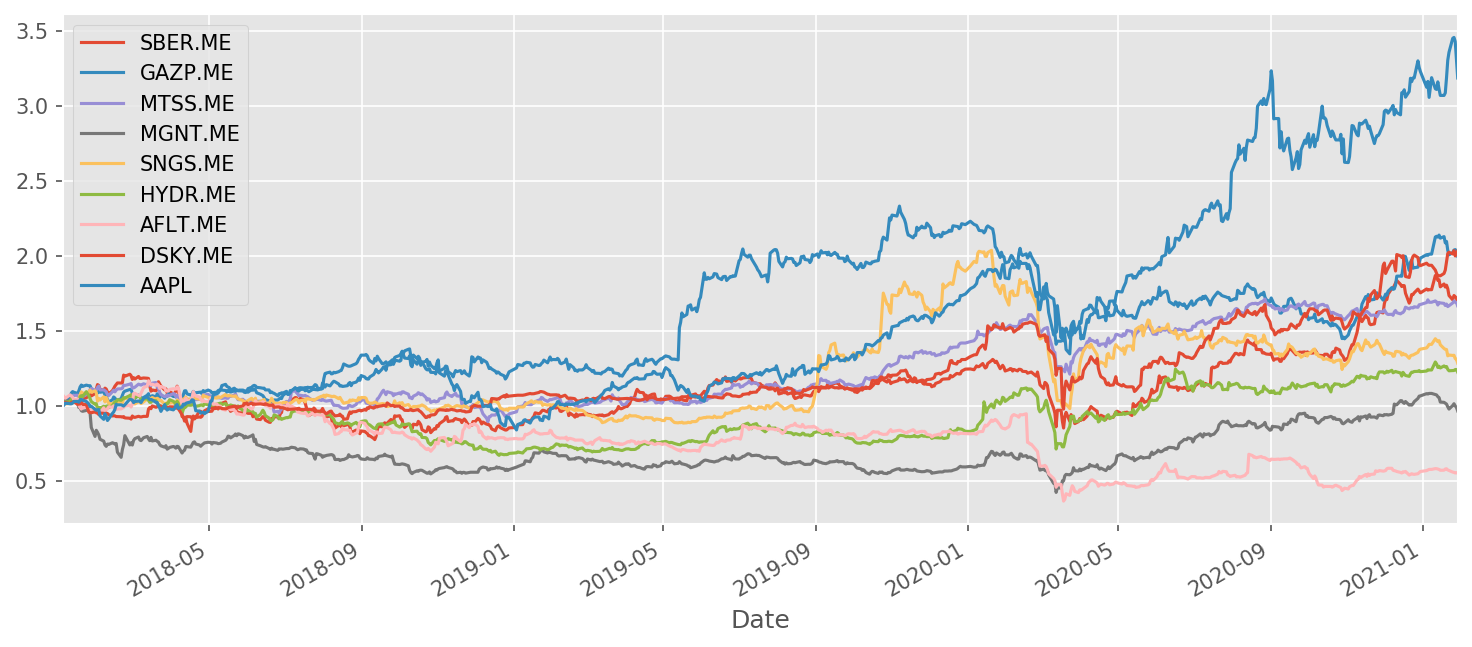

In [5]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
(data.pct_change()+1).cumprod().plot(ax=ax)
plt.show()

## Daily return

In [5]:
return_pct = data.pct_change().apply(lambda x: np.log(1+x))
return_pct.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
Date,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.029320,0.027530,0.023674,0.021962,0.009629,0.019392,0.058779,0.020367,0.004634
2018-01-05,-0.000838,0.009011,-0.002662,0.014229,0.001596,0.004889,-0.010803,0.000000,0.011321
2018-01-09,0.007516,0.020786,0.006024,-0.018614,0.003537,0.001317,0.021492,-0.007081,-0.003836


In [6]:
mean_return = return_pct.mean(skipna=True)
mean_return*100

SBER.ME    0.066873
GAZP.ME    0.089769
MTSS.ME    0.066206
MGNT.ME   -0.004737
SNGS.ME    0.032354
HYDR.ME    0.026097
AFLT.ME   -0.077677
DSKY.ME    0.092079
AAPL       0.150438
dtype: float64

In [13]:
cov_matrix = return_pct.cov()
cov_matrix*100

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
SBER.ME,0.041684,0.017026,0.012437,0.012834,0.011700,0.015538,0.018934,0.011657,0.009630
GAZP.ME,0.017026,0.029198,0.009434,0.010492,0.014308,0.010507,0.011888,0.006092,0.007413
MTSS.ME,0.012437,0.009434,0.017032,0.009011,0.009291,0.008998,0.008309,0.005328,0.007560
MGNT.ME,0.012834,0.010492,0.009011,0.038906,0.009633,0.012650,0.010364,0.003936,0.007121
SNGS.ME,0.011700,0.014308,0.009291,0.009633,0.039105,0.011925,0.011979,0.006118,0.007615
HYDR.ME,0.015538,0.010507,0.008998,0.012650,0.011925,0.030549,0.013865,0.007356,0.008479
AFLT.ME,0.018934,0.011888,0.008309,0.010364,0.011979,0.013865,0.052676,0.010575,0.004520
DSKY.ME,0.011657,0.006092,0.005328,0.003936,0.006118,0.007356,0.010575,0.027566,0.002942
AAPL,0.009630,0.007413,0.007560,0.007121,0.007615,0.008479,0.004520,0.002942,0.048713


## Monthly return

In [11]:
#monthly return
new_data = data.resample('M').last().pct_change()
new_data.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
Date,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,0.029868,-0.001395,-0.004531,-0.102814,-0.000870,0.077188,0.061140,-0.021622,0.068185
2018-03-31,-0.069126,-0.005798,-0.043726,-0.021330,-0.012015,-0.014843,0.100035,0.065746,-0.058051
2018-04-30,-0.104823,0.025293,0.007649,0.047436,0.037716,-0.032342,-0.074550,-0.031623,-0.015020


In [15]:
new_mean_return = new_data.mean()
new_mean_return*100

SBER.ME    1.455079
GAZP.ME    2.066489
MTSS.ME    1.205357
MGNT.ME    0.782798
SNGS.ME    0.936364
HYDR.ME    0.831741
AFLT.ME   -0.844261
DSKY.ME    2.420134
AAPL       3.821554
dtype: float64

In [16]:
new_cov_matrix = new_data.cov()
new_cov_matrix

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
SBER.ME,0.008049,0.003786,0.002409,0.002974,0.002677,0.002823,0.005835,0.004609,0.002980
GAZP.ME,0.003786,0.007864,0.001618,0.001082,0.003177,0.000605,0.004480,0.002025,0.001375
MTSS.ME,0.002409,0.001618,0.002148,0.001639,0.001617,0.001743,0.002390,0.001186,0.002511
MGNT.ME,0.002974,0.001082,0.001639,0.007118,0.000584,0.002970,0.002996,0.001977,0.002612
SNGS.ME,0.002677,0.003177,0.001617,0.000584,0.007086,0.000244,0.003942,0.001540,0.002735
HYDR.ME,0.002823,0.000605,0.001743,0.002970,0.000244,0.004628,0.002658,0.002480,0.002215
AFLT.ME,0.005835,0.004480,0.002390,0.002996,0.003942,0.002658,0.012872,0.004946,0.004780
DSKY.ME,0.004609,0.002025,0.001186,0.001977,0.001540,0.002480,0.004946,0.006304,0.001859
AAPL,0.002980,0.001375,0.002511,0.002612,0.002735,0.002215,0.004780,0.001859,0.009755


In [18]:
new_data.cov()

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
SBER.ME,0.008049,0.003786,0.002409,0.002974,0.002677,0.002823,0.005835,0.004609,0.002980
GAZP.ME,0.003786,0.007864,0.001618,0.001082,0.003177,0.000605,0.004480,0.002025,0.001375
MTSS.ME,0.002409,0.001618,0.002148,0.001639,0.001617,0.001743,0.002390,0.001186,0.002511
MGNT.ME,0.002974,0.001082,0.001639,0.007118,0.000584,0.002970,0.002996,0.001977,0.002612
SNGS.ME,0.002677,0.003177,0.001617,0.000584,0.007086,0.000244,0.003942,0.001540,0.002735
HYDR.ME,0.002823,0.000605,0.001743,0.002970,0.000244,0.004628,0.002658,0.002480,0.002215
AFLT.ME,0.005835,0.004480,0.002390,0.002996,0.003942,0.002658,0.012872,0.004946,0.004780
DSKY.ME,0.004609,0.002025,0.001186,0.001977,0.001540,0.002480,0.004946,0.006304,0.001859
AAPL,0.002980,0.001375,0.002511,0.002612,0.002735,0.002215,0.004780,0.001859,0.009755


## Optimization

In [28]:
from scipy.optimize import linprog
from scipy.optimize import minimize

### Maximize porfolio return

In [103]:
bnds = tuple([(0.05, 0.15) for i in range(n)])
init = np.repeat(0.05, n)

cons = ({'type':'eq', 'fun': lambda x: np.dot(np.ones(n), x)-1})

opt1 = minimize(lambda x: -np.dot(x, new_mean_return), init, bounds=bnds, constraints=cons)
opt1

     fun: -0.017761595193810435
     jac: array([-0.01455079, -0.02066489, -0.01205357, -0.00782798, -0.00936364,
       -0.00831741,  0.00844261, -0.02420134, -0.03821554])
 message: 'Optimization terminated successfully.'
    nfev: 110
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.15      , 0.15      , 0.15      , 0.05010086, 0.08778733,
       0.06211182, 0.05      , 0.15      , 0.15      ])

In [104]:
portf_r = round(np.dot(new_mean_return, opt1.x), 4)
print(f'Return: {round(portf_r*100, 4)} %')

Return: 1.78 %


In [105]:
print(f'Risk: {np.round(np.dot(np.dot(w, new_cov_matrix), opt1.x)*100, 4)} %')

Risk: 0.3094 %


### Maximize Sharpe ratio

In [150]:
bnds = tuple([(0.05, 0.15) for i in range(n)])
init = np.repeat(0.05, n)

def fun(x):
    return -(np.dot(new_mean_return, x) - rf)/np.dot(np.dot(x, new_cov_matrix), x)

cons = ({'type':'eq', 'fun': lambda x: np.dot(np.ones(n), x)-1})

opt2 = minimize(fun, init, method='SLSQP', bounds=bnds, constraints=cons)
opt2

     fun: 6.505702623403067
     jac: array([-19.4754675 , -17.43727028, -10.0486027 , -10.43513256,
       -12.76650089,  -9.58205235, -17.7298398 , -18.3339116 ,
       -23.3280496 ])
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.15, 0.15, 0.05, 0.05, 0.1 , 0.05, 0.15, 0.15, 0.15])

In [151]:
portf_r2 = round(np.dot(new_mean_return, opt2.x), 4)
print(f'Return: {round(portf_r2*100, 4)} %')

Return: 1.57 %


In [152]:
print(f'Risk: {np.round(np.dot(np.dot(w, new_cov_matrix), opt2.x)*100, 4)} %')

Risk: 0.3442 %


## $\min\limits_x\{-t\cdot r \cdot x^T+\frac{1}{2} x\sum x^T | \sum_{i=1}^n x=1\}$

In [162]:
bnds = tuple([(0.05, 0.15) for i in range(n)])
init = np.repeat(0.05, n)
t = 0.4

def fun(x):
    return -t * np.dot(new_mean_return, x) + 0.5 * np.dot(np.dot(x, new_cov_matrix), x)

cons = ({'type':'eq', 'fun': lambda x: np.dot(np.ones(n), x)-1})

opt3 = minimize(fun, init, method='SLSQP', bounds=bnds, constraints=cons)
opt3

     fun: -0.005564640879473322
     jac: array([-0.00178488, -0.0052343 , -0.00290002, -0.00083964, -0.00118304,
       -0.00121163,  0.00798741, -0.00668157, -0.01178146])
 message: 'Optimization terminated successfully.'
    nfev: 154
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([0.13259374, 0.15      , 0.15      , 0.05      , 0.08476694,
       0.08263932, 0.05      , 0.15      , 0.15      ])

In [163]:
portf_r3 = round(np.dot(new_mean_return, opt3.x), 4)
print(f'Return: {round(portf_r3*100, 4)} %')

Return: 1.76 %


In [164]:
print(f'Risk: {np.round(np.dot(np.dot(w, new_cov_matrix), opt3.x)*100, 4)} %')

Risk: 0.3059 %


### Monte Carlo method

In [175]:
rf = 0.04
num_portf = 10000
p_r = []
p_std = []
p_w = []

for i in range(num_portf):
    w = np.random.uniform(0.05, 0.15, n)
    w = w/np.sum(w)
    p_w.append(w)
    
    returns = np.dot(w, new_mean_return)
    p_r.append(returns*100)
    
    std = np.dot(np.dot(w, new_cov_matrix), w)**(1/2)
    p_std.append(std*100)

In [176]:
array = {'Returns':p_r, 'Risks':p_std}

for i, stock in enumerate(names):
    array[stock] = [w[i] for w in p_w]
    
portfolios = pd.DataFrame(array)    
portfolios.head(4)

,Returns,Risks,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
0,1.615376,5.672998,0.136796,0.162746,0.071132,0.095394,0.098885,0.086673,0.085864,0.125431,0.137077
1,1.224202,5.510245,0.092770,0.103677,0.119580,0.136652,0.127485,0.142260,0.128476,0.053631,0.095468
2,1.587305,5.659757,0.142223,0.120820,0.140461,0.059887,0.117115,0.068148,0.097505,0.099607,0.154234
3,1.347630,5.455272,0.058430,0.137620,0.127444,0.100533,0.138316,0.134011,0.121351,0.063698,0.118597


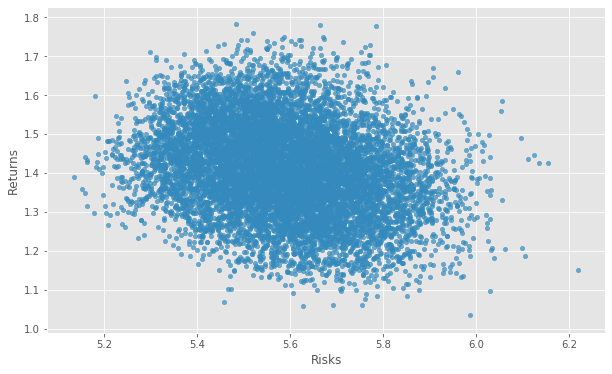

In [177]:
fig, ax = plt.subplots(figsize=(10, 6))
portfolios.plot.scatter(x='Risks', y='Returns', ax=ax, alpha=0.7)
plt.show()

In [178]:
sharpe = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risks']).idxmax()]
sharpe

Returns    1.781903
Risks      5.485011
SBER.ME    0.075765
GAZP.ME    0.099338
MTSS.ME    0.136418
MGNT.ME    0.096720
SNGS.ME    0.067802
HYDR.ME    0.089352
AFLT.ME    0.069899
DSKY.ME    0.175753
AAPL       0.188954
Name: 6866, dtype: float64

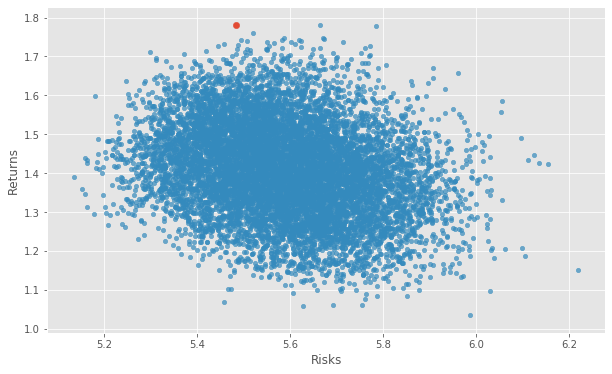

In [179]:
fig, ax = plt.subplots(figsize=(10, 6))
portfolios.plot(x='Risks', y='Returns', marker='o', kind='scatter', ax=ax, alpha=0.7)
plt.scatter(sharpe[1], sharpe[0], s=40)
plt.show()

MIT License

Copyright (c) 2021 Kirill Zakharov

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.